Red sections: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2), (6, 2), (7, 2), (0, 3), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (7, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (5, 4), (6, 4), (7, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (0, 6), (1, 6), (2, 6), (3, 6), (4, 6), (5, 6), (6, 6), (7, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7), (0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8)]


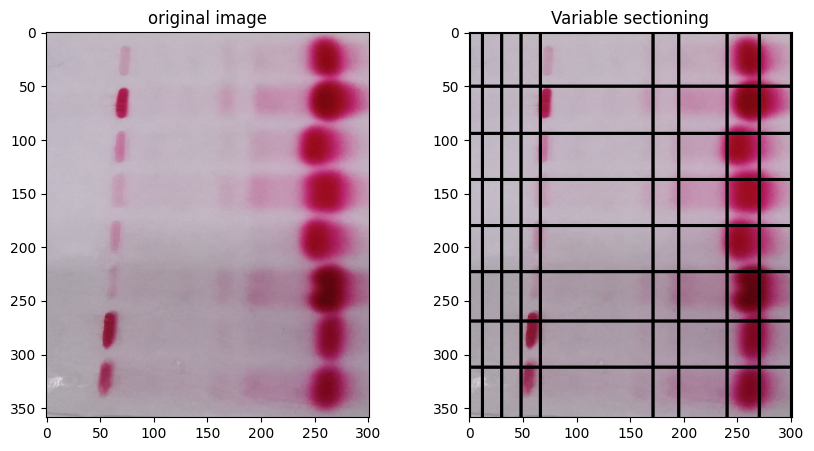

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a function to calculate variable section widths based on a list of percentages
def calculate_variable_widths(image_dimension, percentages):
    section_widths = []
    for percentage in percentages:
        section_width = int(image_dimension * (percentage / 100))
        section_widths.append(section_width)
    return section_widths

# Read the image

image = cv2.imread("/content/drive/Othercomputers/My Computer/Mohaz/Projects/Machine_learning with python/Machine-Learning/thalasemia/Raw Data/5.jpg")
image = cv2.resize(image, (301, 359))
r_image = image
# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the list of percentages for variable section widths in both x and y axes
percentages_x = [4, 6, 6, 6, 35,8, 15, 10,10]
percentages_y = [14, 12.5, 12, 12, 12, 13, 12, 13.5]

# Calculate the section widths based on percentages and image width and height
section_widths_x = calculate_variable_widths(image.shape[1], percentages_x)
section_widths_y = calculate_variable_widths(image.shape[0], percentages_y)

# Initialize empty list to store red sections and section boundaries
red_sections = []
section_boundaries_x = []
section_boundaries_y = []
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(r_image, cv2.COLOR_BGR2RGB))
plt.title('original image')

# Loop through each section in x-axis
for i, section_width_x in enumerate(section_widths_x):
    if i == 0:
        start_x = 0
    else:
        start_x = section_boundaries_x[i - 1]  # Use the previous section boundary as the starting point
    end_x = start_x + section_width_x

    section_boundaries_x.append(end_x)

    # Loop through each section in y-axis
    for j, section_width_y in enumerate(section_widths_y):
        if j == 0:
            start_y = 0
        else:
            start_y = section_boundaries_y[j - 1]  # Use the previous section boundary as the starting point
        end_y = start_y + section_width_y

        section_boundaries_y.append(end_y)

        # Extract the current section
        section = grayscale_image[start_y:end_y, start_x:end_x]

        # Threshold the section to convert it to black and white
        _, binary_section = cv2.threshold(section, 170, 255, cv2.THRESH_BINARY)

        # Check if any pixel in the section is black (representing red in the original image)
        # Draw lines on the output image to mark the section boundaries (RGB)
        #cv2.line(image, (start_x, start_y), (end_x, start_y), (0, 0, 0), 1)
        #cv2.line(image, (start_x, start_y), (start_x, end_y), (0, 0, 0), 1)


        #if np.sum(binary_section == 0) > 0:
        red_sections.append((j, i))

            # Draw bounding box around the detected section
        cv2.rectangle(image, (start_x, start_y), (end_x, end_y), (0, 0, 0), 2)



# Print the indices of the red sections and section boundaries
print(f"Red sections: {red_sections}")

# Display the output image with bounding boxes
# Display the enhanced grayscale image

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Variable sectioning')

plt.savefig('/content/drive/Othercomputers/My Computer/Mohaz/Projects/Machine_learning with python/Machine-Learning/thalasemia/new2.jpeg', bbox_inches='tight')
plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np

# Define a function to calculate variable section widths based on a list of percentages
def calculate_variable_widths(image_dimension, percentages):
    section_widths = []
    for percentage in percentages:
        section_width = int(image_dimension * (percentage / 100))
        section_widths.append(section_width)
    return section_widths

# Function to perform contrast stretching
def contrast_stretching(img, min_out, max_out):
    min_in, max_in = np.min(img), np.max(img)
    stretched_img = ((img - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out
    return np.uint8(stretched_img)

# Read the image
image = cv2.imread("1.jpg")

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance the grayscale image using contrast stretching
enhanced_image = contrast_stretching(grayscale_image, 0, 255)

# Define the list of percentages for variable section widths in both x and y axes
percentages_x = [4, 6, 6, 6, 35, 8, 15, 10, 10]
percentages_y = [14, 12.5, 12, 12, 12, 13, 12, 13.5]

# Calculate the section widths based on percentages and image width and height
section_widths_x = calculate_variable_widths(image.shape[1], percentages_x)
section_widths_y = calculate_variable_widths(image.shape[0], percentages_y)
section_boundaries_x = []
section_boundaries_y = []

# Initialize empty list to store red sections and section boundaries
red_sections = []

# Loop through each section in x-axis
for i, section_width_x in enumerate(section_widths_x):
    if i == 0:
        start_x = 0
    else:
        start_x = section_boundaries_x[i - 1]  # Use the previous section boundary as the starting point
    end_x = start_x + section_width_x

    # Loop through each section in y-axis
    for j, section_width_y in enumerate(section_widths_y):
        if j == 0:
            start_y = 0
        else:
            start_y = section_boundaries_y[j - 1]  # Use the previous section boundary as the starting point
        end_y = start_y + section_width_y

        # Extract the current section from the enhanced image
        section = enhanced_image[start_y:end_y, start_x:end_x]

        # Threshold the section to convert it to black and white
        _, binary_section = cv2.threshold(section, 5, 255, cv2.THRESH_BINARY)

        # Check if any pixel in the section is black (representing red in the original image)
        if np.sum(binary_section == 0) > 0:
            red_sections.append((j, i))

            # Draw bounding box around the detected section
            cv2.rectangle(enhanced_image, (start_x, start_y), (end_x, end_y), (0, 0, 0), 2)

# Print the indices of the red sections and section boundaries
print(f"Red sections: {red_sections}")

# Display the enhanced grayscale image
cv2.imshow("Enhanced Grayscale Image", enhanced_image)

# Display the output image with bounding boxes
#cv2.imshow("Output Image with Bounding Boxes", image)

cv2.waitKey(0)


IndexError: list index out of range

In [ ]:
import cv2
import numpy as np

# Define a function to calculate variable section widths based on a list of percentages
def calculate_variable_widths(image_dimension, percentages):
    section_widths = []
    for percentage in percentages:
        section_width = int(image_dimension * (percentage / 100))
        section_widths.append(section_width)
    return section_widths

# Function to perform contrast stretching
def contrast_stretching(img, min_out, max_out):
    min_in, max_in = np.min(img), np.max(img)
    stretched_img = ((img - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out
    return np.uint8(stretched_img)

# Read the image
image = cv2.imread("1.jpg")

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance the grayscale image using contrast stretching
enhanced_image = contrast_stretching(grayscale_image, 0, 255)

# Define the list of percentages for variable section widths in both x and y axes
percentages_x = [4, 6, 6, 6, 35, 8, 15, 10, 10]
percentages_y = [14, 12.5, 12, 12, 12, 13, 12, 13.5]

# Calculate the section widths based on percentages and image width and height
section_widths_x = calculate_variable_widths(image.shape[1], percentages_x)
section_widths_y = calculate_variable_widths(image.shape[0], percentages_y)

# Set the threshold for average pixel value
threshold = 180 # Adjust this value as needed

# Initialize empty list to store red sections and section boundaries
red_sections = []
section_boundaries_x = []
section_boundaries_y = []

# Loop through each section in x-axis
for i, section_width_x in enumerate(section_widths_x):
    if i == 0:
        start_x = 0
    else:
        start_x = section_boundaries_x[i - 1]  # Use the previous section boundary as the starting point
    end_x = start_x + section_width_x

    section_boundaries_x.append(end_x)

    # Loop through each section in y-axis
    for j, section_width_y in enumerate(section_widths_y):
        if j == 0:
            start_y = 0
        else:
            start_y = section_boundaries_y[j - 1]  # Use the previous section boundary as the starting point
        end_y = start_y + section_width_y

        section_boundaries_y.append(end_y)

        # Extract the current section from the enhanced image
        section = enhanced_image[start_y:end_y, start_x:end_x]

        # Calculate the average pixel value
        avg_pixel_value = np.mean(section)

        # Check if the average pixel value is below the threshold
        if avg_pixel_value < threshold:
            red_sections.append((j, i))

            # Draw bounding box around the detected section
            cv2.rectangle(enhanced_image, (start_x, start_y), (end_x, end_y), (0, 0, 0), 2)

# Print the indices of the red sections and section boundaries
print(f"Red sections: {red_sections}")

# Display the enhanced grayscale image
cv2.imshow("Enhanced Grayscale Image", enhanced_image)

cv2.waitKey(0)


Red sections: [(0, 6), (3, 6), (6, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7)]


-1

In [ ]:
import cv2
import numpy as np

# Define a function to calculate variable section widths based on a list of percentages
def calculate_variable_widths(image_dimension, percentages):
    section_widths = []
    for percentage in percentages:
        section_width = int(image_dimension * (percentage / 100))
        section_widths.append(section_width)
    return section_widths

# Function to perform contrast stretching
def contrast_stretching(img, min_out, max_out):
    min_in, max_in = np.min(img), np.max(img)
    stretched_img = ((img - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out
    return np.uint8(stretched_img)

# Read the image
image = cv2.imread("1.jpg")

# Convert the image to grayscale
grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance the grayscale image using contrast stretching
enhanced_image = contrast_stretching(grayscale_image, 0, 255)

# Define the list of percentages for variable section widths in both x and y axes
percentages_x = [4, 6, 6, 6, 35, 8, 15, 10, 10]
percentages_y = [14, 12.5, 12, 12, 12, 13, 12, 13.5]

# Calculate the section widths based on percentages and image width and height
section_widths_x = calculate_variable_widths(image.shape[1], percentages_x)
section_widths_y = calculate_variable_widths(image.shape[0], percentages_y)

# Set the threshold for average pixel value
threshold = 180  # Adjust this value as needed

# Initialize empty list to store red sections and section boundaries
red_sections = []
section_boundaries_x = []
section_boundaries_y = []

# Loop through each section in x-axis
for i, section_width_x in enumerate(section_widths_x):
    if i == 0:
        start_x = 0
    else:
        start_x = section_boundaries_x[i - 1]  # Use the previous section boundary as the starting point
    end_x = start_x + section_width_x

    section_boundaries_x.append(end_x)

    # Loop through each section in y-axis
    for j, section_width_y in enumerate(section_widths_y):
        if j == 0:
            start_y = 0
        else:
            start_y = section_boundaries_y[j - 1]  # Use the previous section boundary as the starting point
        end_y = start_y + section_width_y

        section_boundaries_y.append(end_y)

        # Extract the current section from the enhanced image
        section = enhanced_image[start_y:end_y, start_x:end_x]

        # Calculate the average pixel value
        avg_pixel_value = np.mean(section)

        # Check if the average pixel value is below the threshold
        if avg_pixel_value < threshold:
            red_sections.append((j, i))

            # Determine the label based on the column index
            if i == 6:
                label = "major"
            else:
                label = " "

            # Draw bounding box around the detected section with label
            cv2.rectangle(enhanced_image, (start_x, start_y), (end_x, end_y), (0, 0, 0), 2)
            cv2.putText(enhanced_image, label, (start_x + 5, start_y + 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

# Print the indices of the red sections and section boundaries
print(f"Red sections: {red_sections}")

# Display the enhanced grayscale image
cv2.imshow("Enhanced Grayscale Image", enhanced_image)

cv2.waitKey(0)


Red sections: [(0, 6), (3, 6), (6, 6), (0, 7), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (7, 7)]


-1